# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [3]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
df.stroke = read.csv('Stroke.csv')
df.stroke |> head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


Histogram comparing stroke and non-stroke populations at different ages and average glucose level.

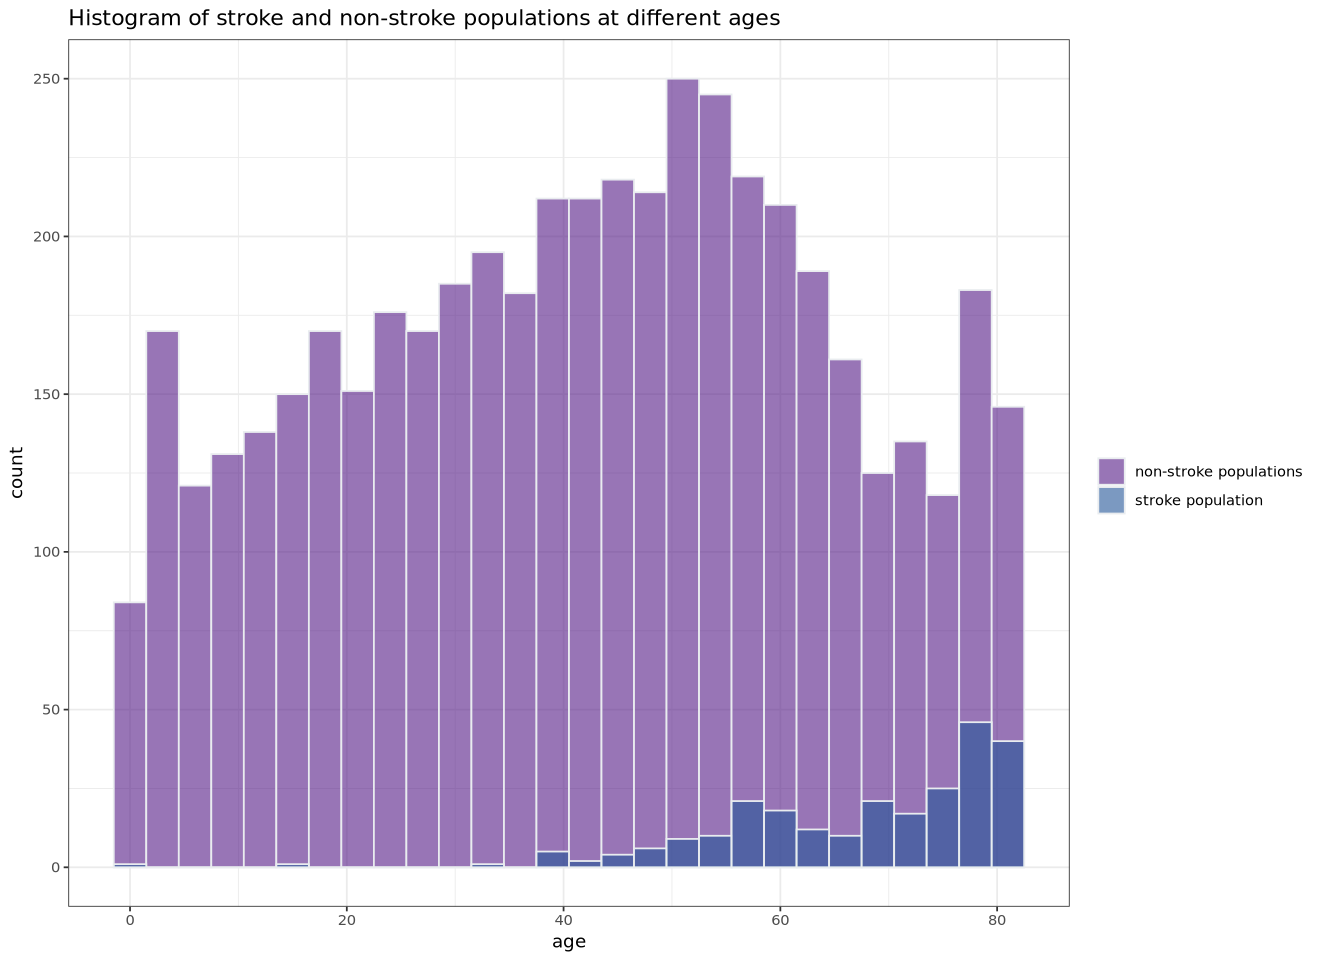

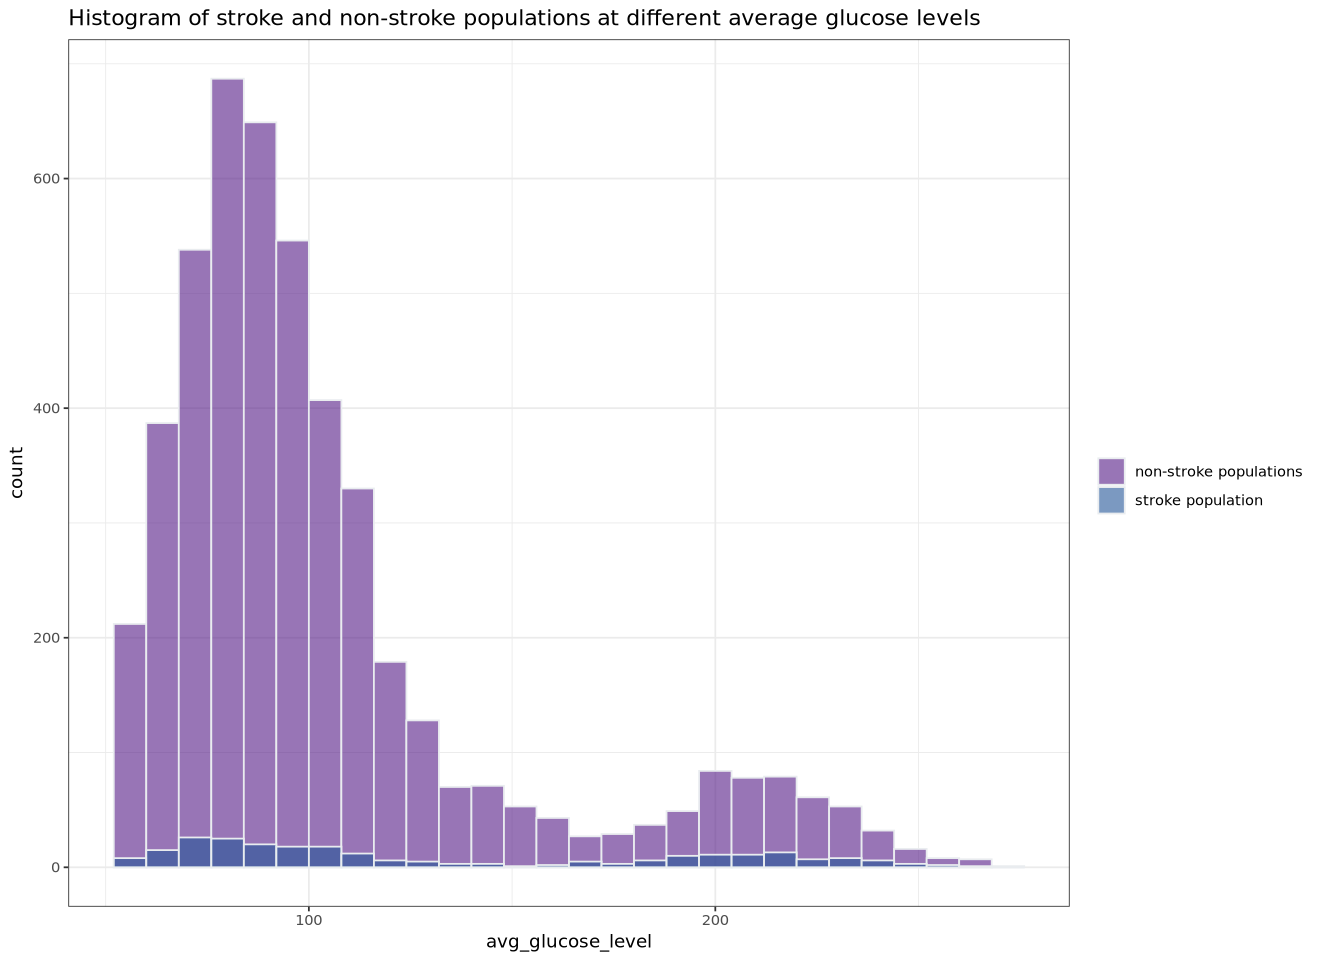

In [26]:
options(repr.plot.res = 120, repr.plot.height = 8, repr.plot.width = 11)

ggplot(df.stroke, aes(x=age, fill=as.factor(stroke))) +
geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity', binwidth = 3) +
scale_fill_manual(values=c("#541985", "#245698"), labels = c("non-stroke populations", "stroke population")) +
theme_bw() +
labs(fill="", title = "Histogram of stroke and non-stroke populations at different ages")
ggplot(df.stroke, aes(x=avg_glucose_level, fill=as.factor(stroke))) +
geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity', binwidth = 8) +
scale_fill_manual(values=c("#541985", "#245698"), labels = c("non-stroke populations", "stroke population")) +
theme_bw() +
labs(fill="", title = "Histogram of stroke and non-stroke populations at different average glucose levels")

Density comparing stroke and non-stroke populations at different ages and average glucose level.

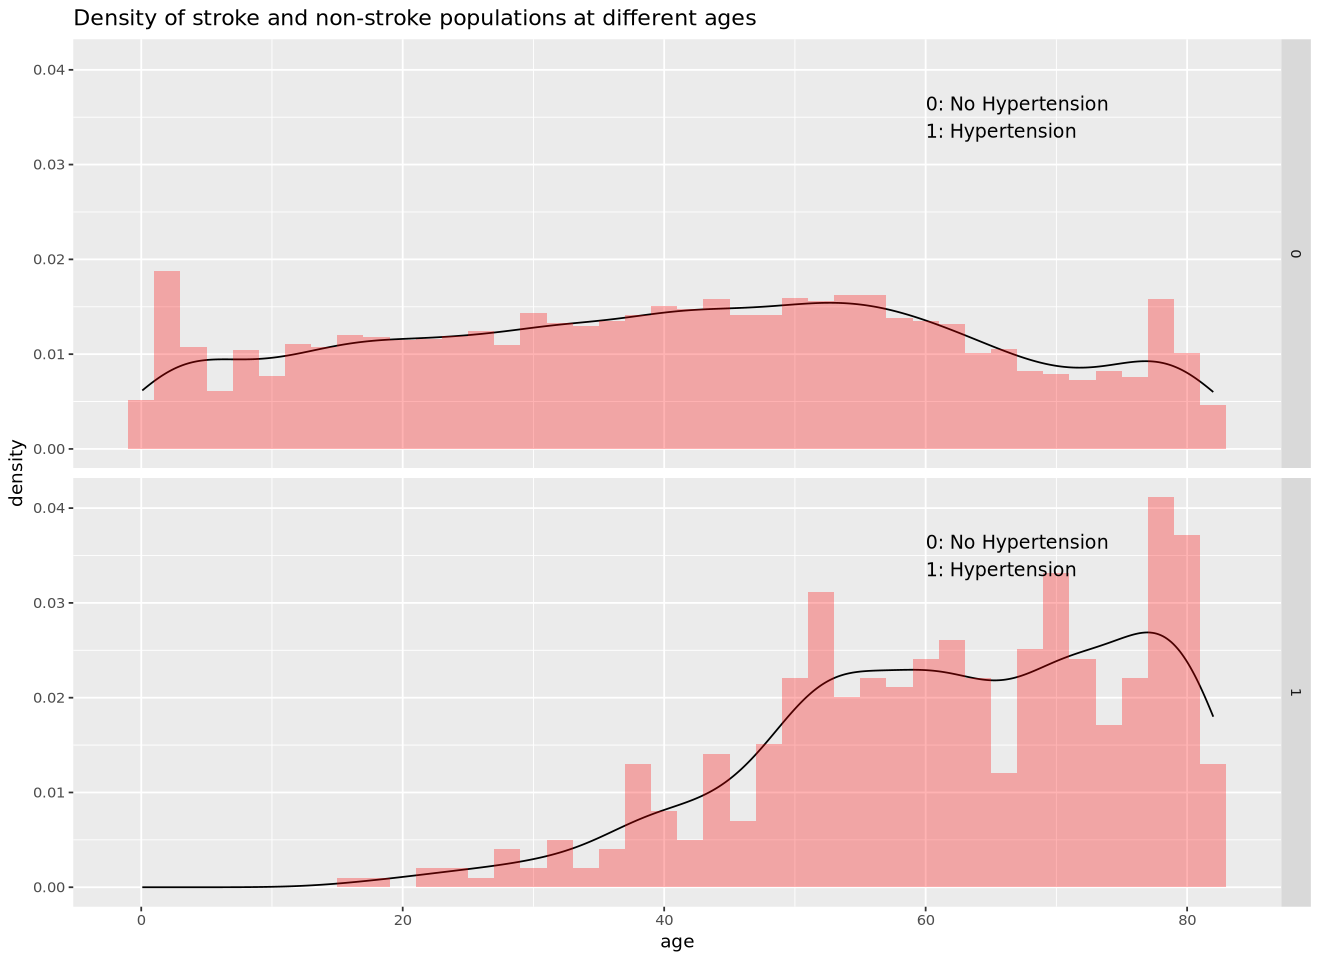

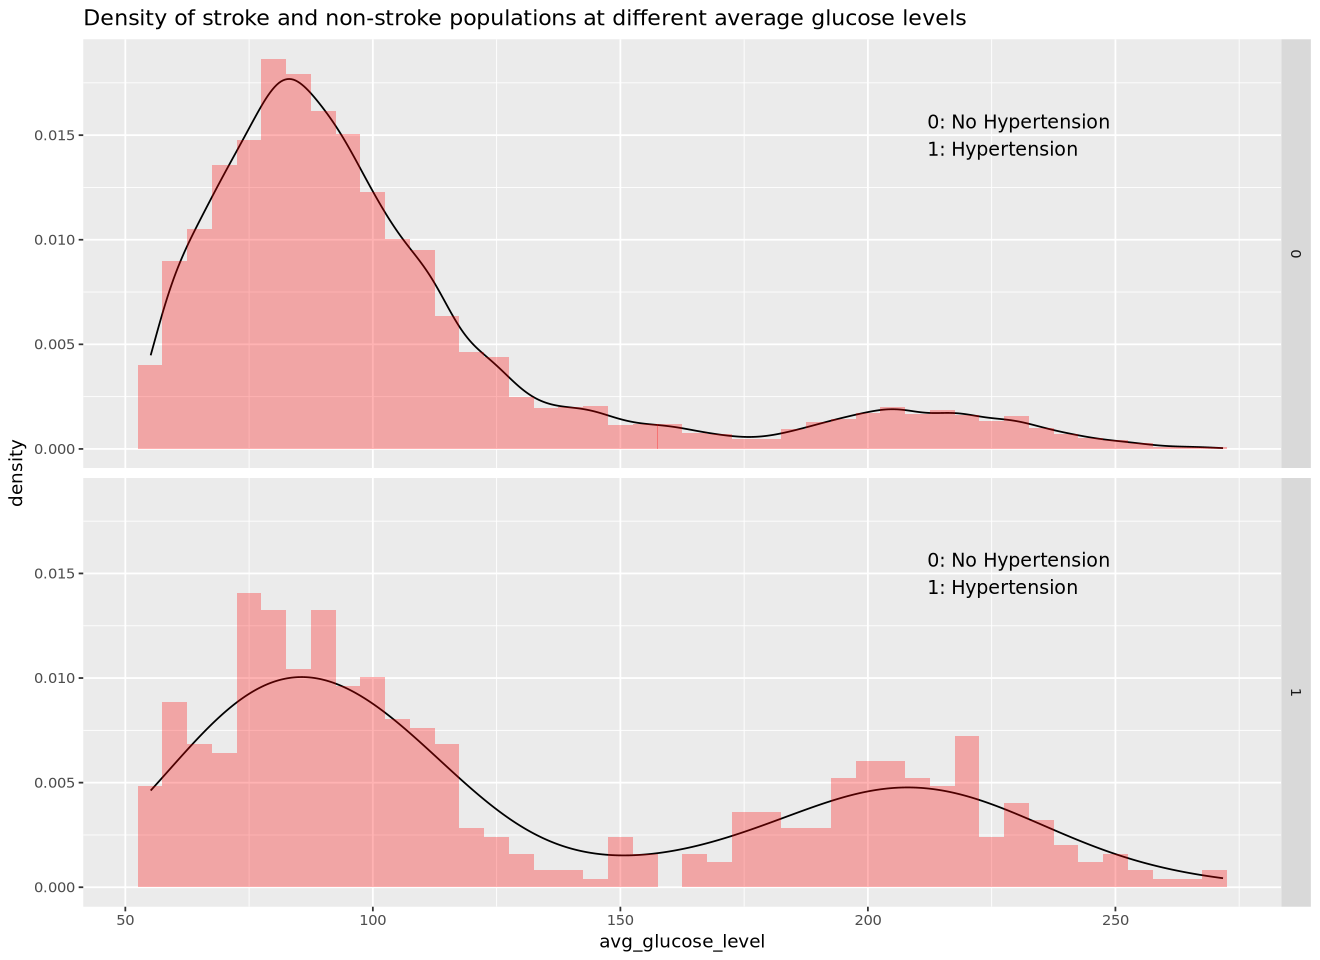

In [61]:
options(repr.plot.res = 120, repr.plot.height = 8, repr.plot.width = 11)

ggplot(df.stroke, aes(age)) +
geom_density(col = "black") +
geom_histogram(aes(y=..density..), alpha = .3, fill = "red",  binwidth = 2) +
facet_grid(as.factor(hypertension)~.) +
labs(title = "Density of stroke and non-stroke populations at different ages") +
annotate("text", x = 60, y = 0.035, label = "0: No Hypertension\n1: Hypertension",
size = 4, hjust = 0, color = "black")

ggplot(df.stroke, aes(avg_glucose_level)) +
geom_density(col = "black") +
geom_histogram(aes(y=..density..), alpha = .3, fill = "red",  binwidth = 5) +
facet_grid(as.factor(hypertension)~.) +
labs(title = "Density of stroke and non-stroke populations at different average glucose levels") +
annotate("text", x = 212, y = 0.015, label = "0: No Hypertension\n1: Hypertension",
size = 4, hjust = 0, color = "black")